Problem Statement - Given the dataset which captures gross salary of the employees and by training with such data we want to predict salary of the employees in the test data

Outlines
1. Import Libraries
2. Import Dataset
3. Data Cleaning and data preparation
4. Exploratory data analysis
5. Features engineering
6. Train test data
7. model building
8. model evaluation

In [68]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [69]:
salary=pd.read_csv('train_salary.csv')

In [70]:
salary

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95
...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12


In [71]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


1. 18981 rows
2. total 7 columns
3. all 7 are object

In [72]:
df=salary.copy()

In [73]:
df.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [74]:
df.columns=df.columns.str.replace(' ','')    #or use str.strip() for removing leading/trailing spaces

In [75]:
df.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [76]:
df['AnnualSalary']=df['AnnualSalary'].apply(lambda x:float(str(x)[1:]))  # or str.replace('$','')  

In [77]:
df

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,$39686.95
...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,11310.0,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,11310.0,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,43999.0,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,44104.0,$48608.12


In [78]:
df.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [79]:
df['HireDate']=df['HireDate'].fillna(method='ffill',axis=0)

In [80]:
df.drop(columns=['GrossPay'],inplace=True)

In [81]:
df

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0
...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,11310.0
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,11310.0
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,43999.0
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,44104.0


In [82]:
df.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

In [83]:
df['HireDate']=pd.to_datetime(df['HireDate'])

In [84]:
df['HireDay']=df['HireDate'].dt.day   ##or apply(lambda x:int(str(x[3:5])))


In [85]:
df['HireMonth']=df['HireDate'].dt.month

In [86]:
df['HireYear']=df['HireDate'].dt.year

In [87]:
df

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,2013-06-10,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,1979-10-24,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,2006-09-25,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,2009-07-23,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,2013-07-24,43999.0,24,7,2013
...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,2014-05-21,11310.0,21,5,2014
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,2014-05-21,11310.0,21,5,2014
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,2013-12-17,43999.0,17,12,2013
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,2013-01-23,44104.0,23,1,2013


## Which agency id has more hirings

In [88]:
df['AgencyID'].value_counts()

AgencyID
P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02539      1
A65052      1
W02106      1
W02590      1
W02339      1
Name: count, Length: 1177, dtype: int64

In [89]:
df['Agency'].value_counts()

Agency
Youth Summer                4323
Police Department           3211
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: count, Length: 65, dtype: int64

In [90]:
df['JobTitle'].value_counts()

JobTitle
AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
VEHICLE DAMAGE INVESTIGATOR          1
Community Health Nurse I             1
ACCOUNTING SYSTEMS ANALYST           1
DESK TOP PUBLISHING COORDINATO       1
Research Analyst II                  1
Name: count, Length: 1075, dtype: int64

Text(0.5, 1.0, 'Annua Salary Distribution Plot')

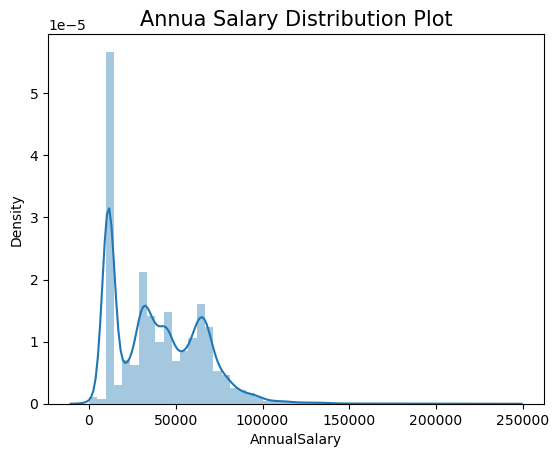

In [91]:
sns.distplot(df['AnnualSalary'])
plt.title('Annua Salary Distribution Plot',fontsize=15)

<Axes: >

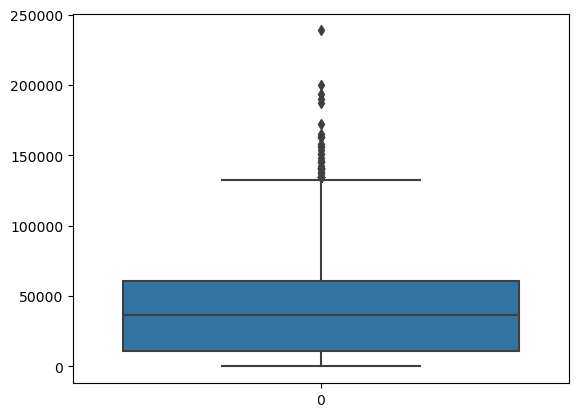

In [92]:
sns.boxplot(df['AnnualSalary'])

In [93]:
df.shape

(18981, 9)

In [94]:
len(df[df['AnnualSalary']>140000])

25

In [95]:
##excluding or dropping these outliers
df=df[df['AnnualSalary']<140000]

<Axes: >

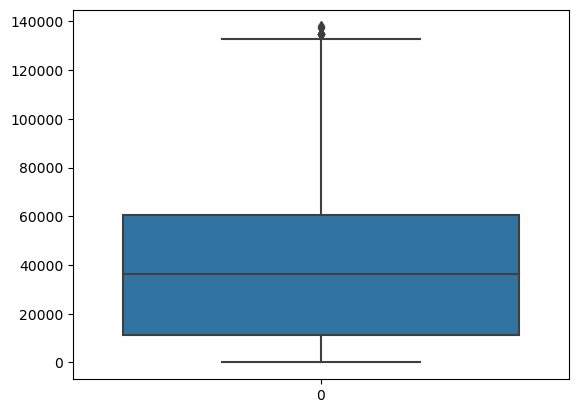

In [96]:
sns.boxplot(df['AnnualSalary'])

### Exploratory Data Analysis



In [97]:
#Top 10 jobs based on hirings
top10=df.groupby(['JobTitle'])['Name'].count().sort_values(ascending=False).head(10)

Text(0, 0.5, 'Hirings')

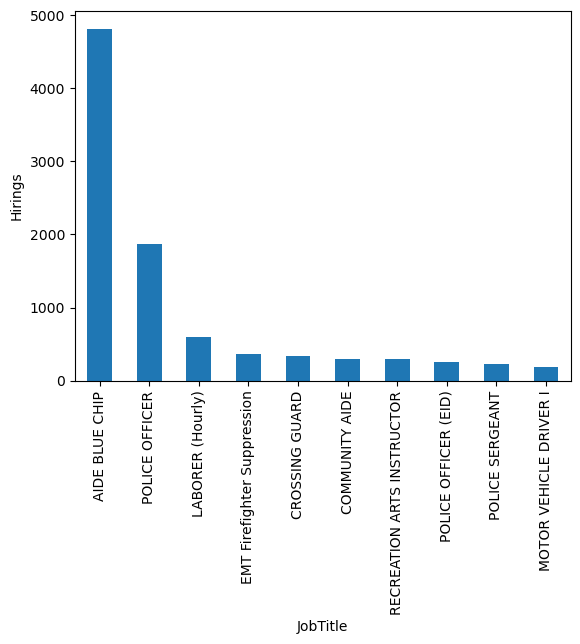

In [98]:
top10.plot.bar()
plt.ylabel('Hirings')

Text(0, 0.5, 'Salary')

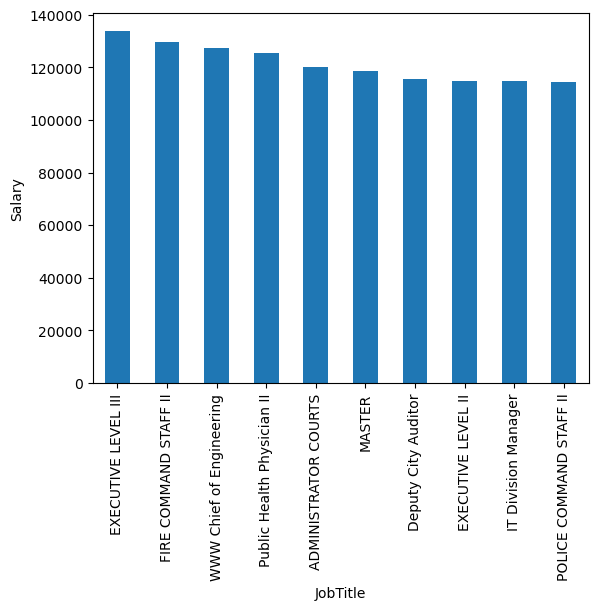

In [99]:
#Top 10 jobs that fetch Highest Salary
df.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Salary')

Text(0, 0.5, 'Employees')

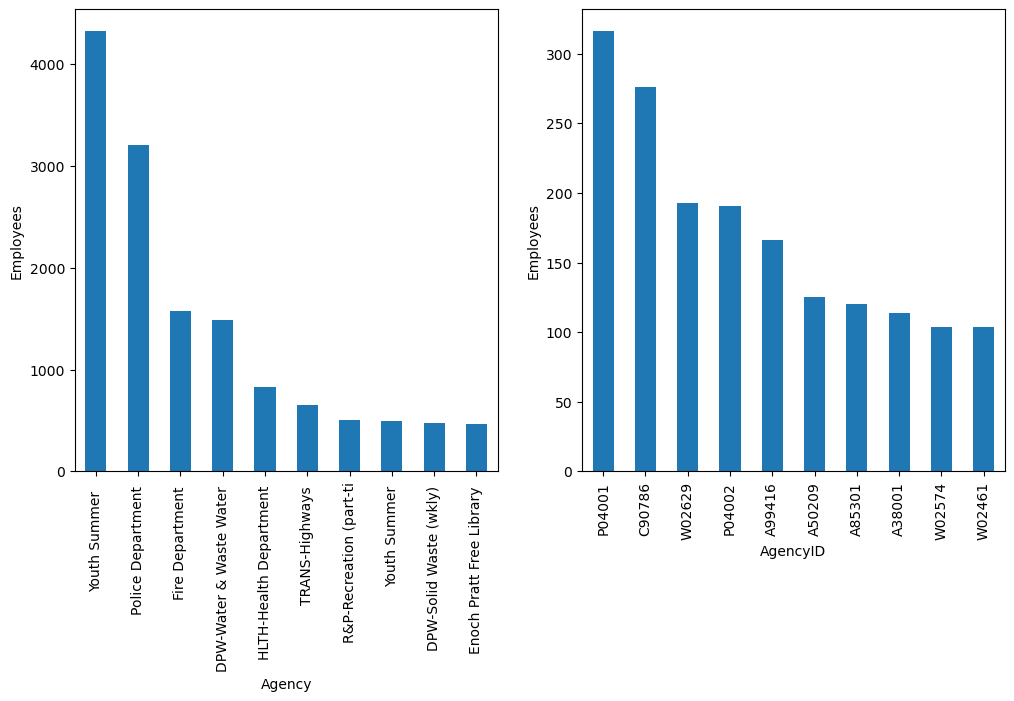

In [100]:
#Top agencies with Higher number of employees
#Top AgencyIds with higher number of Employees
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
df.groupby(['Agency'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Employees')

plt.subplot(1,2,2)

df.groupby(['AgencyID'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Employees')

In [101]:
#The jobs whose average pay is more than the average salary of the entire data
mean_job=df.AnnualSalary.mean()
good_paying_jobs=df.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()

In [102]:
good_paying_jobs[good_paying_jobs['AnnualSalary']>mean_job]

,JobTitle,AnnualSalary
0,911 LEAD OPERATOR,47886.000000
1,911 OPERATOR,42835.743590
2,911 OPERATOR SUPERVISOR,54797.500000
3,ACCOUNT EXECUTIVE,42960.000000
4,ACCOUNTANT I,46316.642857
...,...,...
1064,ZONING ADMINISTRATOR,82100.000000
1065,ZONING APPEALS ADVISOR BMZA,59274.000000
1066,ZONING ENFORCEMENT OFFICER,62000.000000
1067,ZONING EXAMINER I,43674.000000


In [103]:
df.JobTitle.nunique()  #or len(df.JobTitle.unique())

1069

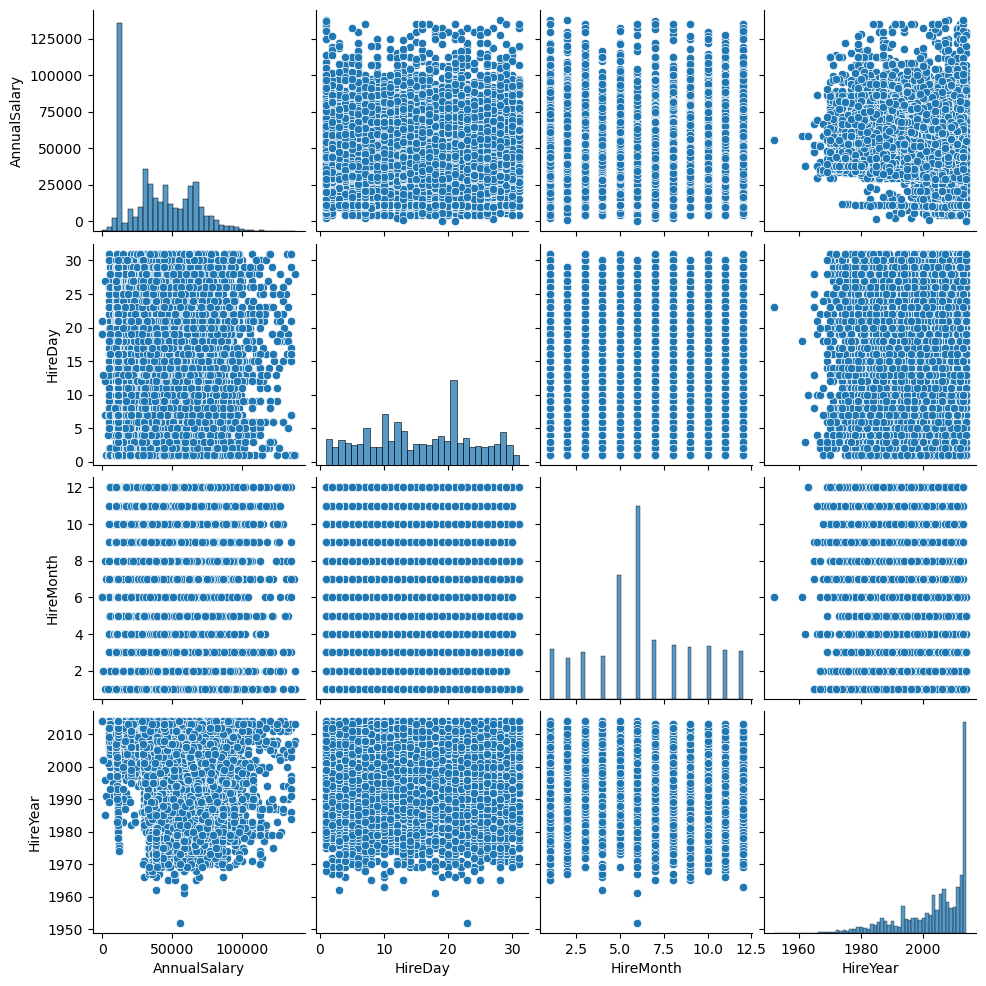

In [104]:
sns.pairplot(df)

<Axes: >

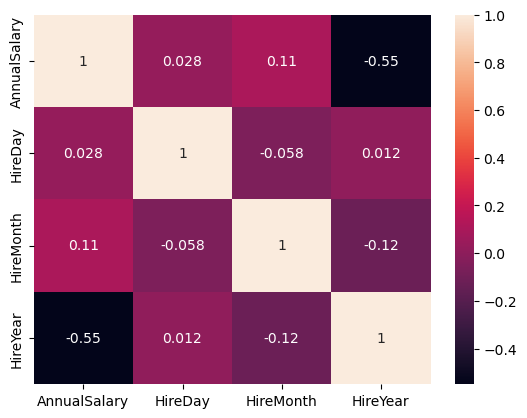

In [105]:
#plotting a heatmap
sns.heatmap(df[['AnnualSalary','HireDay','HireMonth','HireYear']].corr(),annot=True)

## Features Engineering

In [106]:
df

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,2013-06-10,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,1979-10-24,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,2006-09-25,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,2009-07-23,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,2013-07-24,43999.0,24,7,2013
...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,2014-05-21,11310.0,21,5,2014
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,2014-05-21,11310.0,21,5,2014
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,2013-12-17,43999.0,17,12,2013
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,2013-01-23,44104.0,23,1,2013


In [107]:
mean_job=df.groupby(['JobTitle'])['AnnualSalary'].mean()
df['JobTitle']=df['JobTitle'].map(mean_job)

In [108]:
df

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",11313.967200,W02200,Youth Summer,2013-06-10,11310.0,10,6,2013
1,"Aaron,Patricia G",47443.500000,A03031,OED-Employment Dev,1979-10-24,53428.0,24,10,1979
2,"Aaron,Petra L",69750.666667,A29005,States Attorneys Office,2006-09-25,68300.0,25,9,2006
3,"Abaineh,Yohannes T",57940.000000,A65026,HLTH-Health Department,2009-07-23,62000.0,23,7,2009
4,"Abbene,Anthony M",44531.160494,A99416,Police Department,2013-07-24,43999.0,24,7,2013
...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",11313.967200,W02235,Youth Summer,2014-05-21,11310.0,21,5,2014
18977,"Zotamou,Pivot D",11313.967200,W02629,Youth Summer,2014-05-21,11310.0,21,5,2014
18978,"Zovistoski,Zachary D",44531.160494,A99416,Police Department,2013-12-17,43999.0,17,12,2013
18979,"Zubyk,Stanislav T",60588.139335,A99262,Police Department,2013-01-23,44104.0,23,1,2013


In [109]:
mean_agency=df.groupby(['Agency'])['AnnualSalary'].mean()
df['Agency']=df['Agency'].map(mean_agency)

In [110]:
mean_agencyid=df.groupby(['AgencyID'])['AnnualSalary'].mean()
df['AgencyID']=df['AgencyID'].map(mean_agencyid)

In [111]:
df

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",11313.967200,11310.000000,11310.270645,2013-06-10,11310.0,10,6,2013
1,"Aaron,Patricia G",47443.500000,46667.000000,51495.424242,1979-10-24,53428.0,24,10,1979
2,"Aaron,Petra L",69750.666667,65926.133333,64874.560224,2006-09-25,68300.0,25,9,2006
3,"Abaineh,Yohannes T",57940.000000,48071.851064,39980.900360,2009-07-23,62000.0,23,7,2009
4,"Abbene,Anthony M",44531.160494,44012.307229,61575.070137,2013-07-24,43999.0,24,7,2013
...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",11313.967200,11310.000000,11310.270645,2014-05-21,11310.0,21,5,2014
18977,"Zotamou,Pivot D",11313.967200,11310.000000,11346.315789,2014-05-21,11310.0,21,5,2014
18978,"Zovistoski,Zachary D",44531.160494,44012.307229,61575.070137,2013-12-17,43999.0,17,12,2013
18979,"Zubyk,Stanislav T",60588.139335,60203.340426,61575.070137,2013-01-23,44104.0,23,1,2013


In [112]:
df=df.drop(['HireDate','Name'],axis=1)

In [113]:
##Train, Test 
train,test=train_test_split(df,train_size=0.7,random_state=25)

In [114]:
train.shape

(13268, 7)

In [115]:
test.shape

(5687, 7)

In [116]:
y_train=train.pop('AnnualSalary')
x_train=train

In [117]:
y_test=test.pop('AnnualSalary')
x_test=test

In [118]:
#Scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train[x_train.columns]=scaler.fit_transform(x_train[x_train.columns])

In [119]:
x_train.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,1.326800e+04,1.326800e+04,1.326800e+04,1.326800e+04,1.326800e+04,1.326800e+04
mean,-1.044286e-16,-6.961905e-17,1.285275e-17,4.498462e-17,4.819780e-18,-1.607665e-15
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.639126e+00,-1.702139e+00,-1.409789e+00,-1.767699e+00,-1.822429e+00,-4.981518e+00
25%,-1.172373e+00,-1.282288e+00,-1.356657e+00,-8.123203e-01,-4.693429e-01,-5.710317e-01
50%,-1.429678e-01,8.348998e-02,1.353152e-01,2.363605e-02,-1.310713e-01,2.918895e-01
75%,8.604104e-01,9.024213e-01,1.043786e+00,7.401701e-01,8.837434e-01,8.671704e-01
max,3.880733e+00,2.876087e+00,1.950458e+00,1.814971e+00,1.898558e+00,9.630505e-01


In [120]:
x_test[x_test.columns]=scaler.fit_transform(x_test[x_test.columns])

In [121]:
lr=LinearRegression()
salary_reg=lr.fit(x_train,y_train)

In [122]:
salary_reg.score(x_train,y_train)   #R2 score //acuracy of training data

0.9646861984905911

In [123]:
y_pred=salary_reg.predict(x_test)  #predicting


In [124]:
y_test

15682    11310.0
8168     20800.0
1287     11310.0
11240    11310.0
3828     37339.0
          ...   
18785    11310.0
1696     65945.0
4095     44910.0
4330     11310.0
3356     65831.0
Name: AnnualSalary, Length: 5687, dtype: float64

In [125]:
y_pred

array([11114.3146382 , 23221.25116866, 11114.3146382 , ...,
       46792.58438135, 11116.06980829, 69194.80805184])

In [126]:
salary_reg.coef_    #value of m

array([ 2.21010259e+04,  3.00487636e+03, -1.84795156e+03,  1.83579561e+00,
       -1.35946391e+02, -2.09351687e+03])

In [127]:
salary_reg.intercept_  #value of c

39781.69809767863

In [134]:
model=str(salary_reg.intercept_)
for i in range(len(salary_reg.coef_)):
    model=model+ ' + ' +str(salary_reg.coef_[i])+ ' * '+ str(x_train.columns[i])
model

'39781.69809767863 + 22101.02589991041 * JobTitle + 3004.876357400224 * AgencyID + -1847.9515623789514 * Agency + 1.8357956050606987 * HireDay + -135.94639102296455 * HireMonth + -2093.5168667340486 * HireYear'

In [135]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9665510424574528